In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)

css_styling()

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv.imread("../static/bk-3.jpg")

In [3]:
h, w, c = img.shape
size = 12

#### Blurring

In [4]:
blur_3x3 = np.ones((3, 3), dtype=np.float32) / 9
blur_5x5 = np.ones((5, 5), dtype=np.float32) / 25
blur_7x7 = np.ones((7, 7), dtype=np.float32) / 49

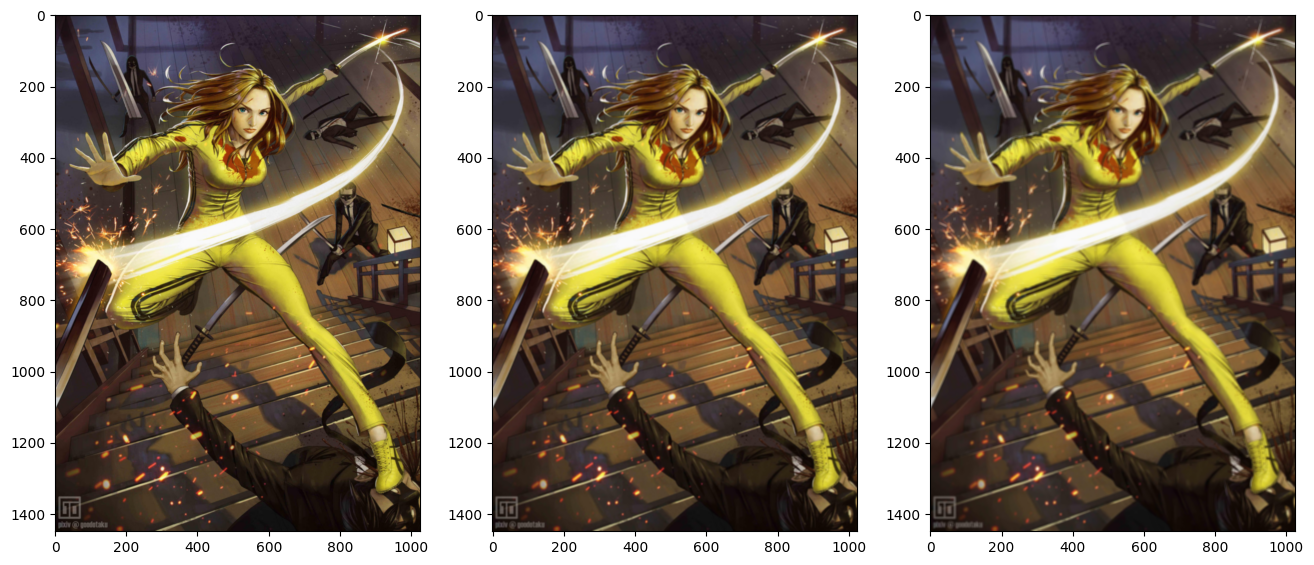

In [5]:
size = 20
plt.figure(figsize=(16, 9))

blurred_1 = cv.filter2D(img, -1, blur_3x3)
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(blurred_1, cv.COLOR_BGR2RGB))

blurred_2 = cv.filter2D(img, -1, blur_5x5)
plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(blurred_2, cv.COLOR_BGR2RGB))

blurred_3 = cv.filter2D(img, -1, blur_7x7)
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(blurred_3, cv.COLOR_BGR2RGB))

plt.show()

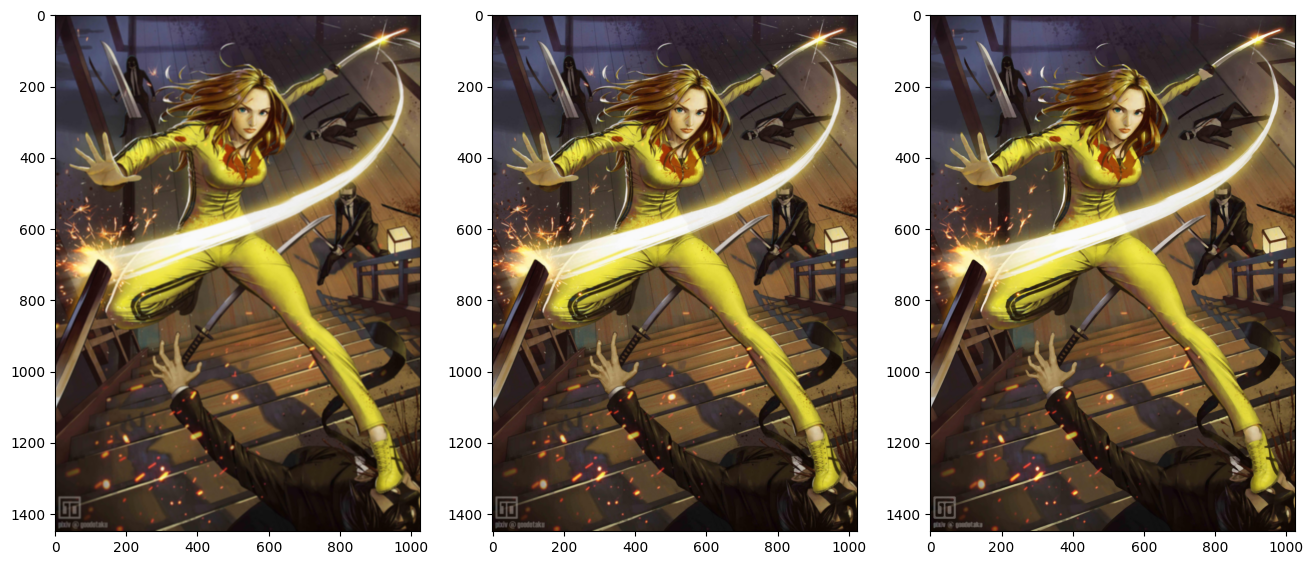

In [6]:
size = 20
plt.figure(figsize=(16, 9))

simple_blur = cv.blur(img, ksize=(5, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(simple_blur, cv.COLOR_BGR2RGB))

gaussian_blur = cv.GaussianBlur(img, (5, 5), 0)
plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(gaussian_blur, cv.COLOR_BGR2RGB))

median_blur = cv.medianBlur(img, 5)
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(median_blur, cv.COLOR_BGR2RGB))

plt.show()

### Thresholding, Binarization

For every pixel, the same threshold value is applied. If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value. The function `cv.threshold` is used to apply the thresholding.

<img src="threshold.jpg">

Probably can be used to fix the lighting in an image.

In [7]:
# Values below 127 go to 0 or black. Everything else goes to 255 or white. 
ret_1, thres_1 = cv.threshold(img, thresh=127, maxval=255, type=cv.THRESH_BINARY)

# Values below 127 are unchanged; above 127 are pushed to 127
ret_2, thres_2 = cv.threshold(img, thresh=127, maxval=255, type=cv.THRESH_TRUNC)

# Values below 127 go to 0; above 127 are unchanged
ret_3, thres_3 = cv.threshold(img, thresh=127, maxval=255, type=cv.THRESH_TOZERO)
ret_4, thres_4 = cv.threshold(img, thresh=127, maxval=255, type=cv.THRESH_TOZERO_INV)

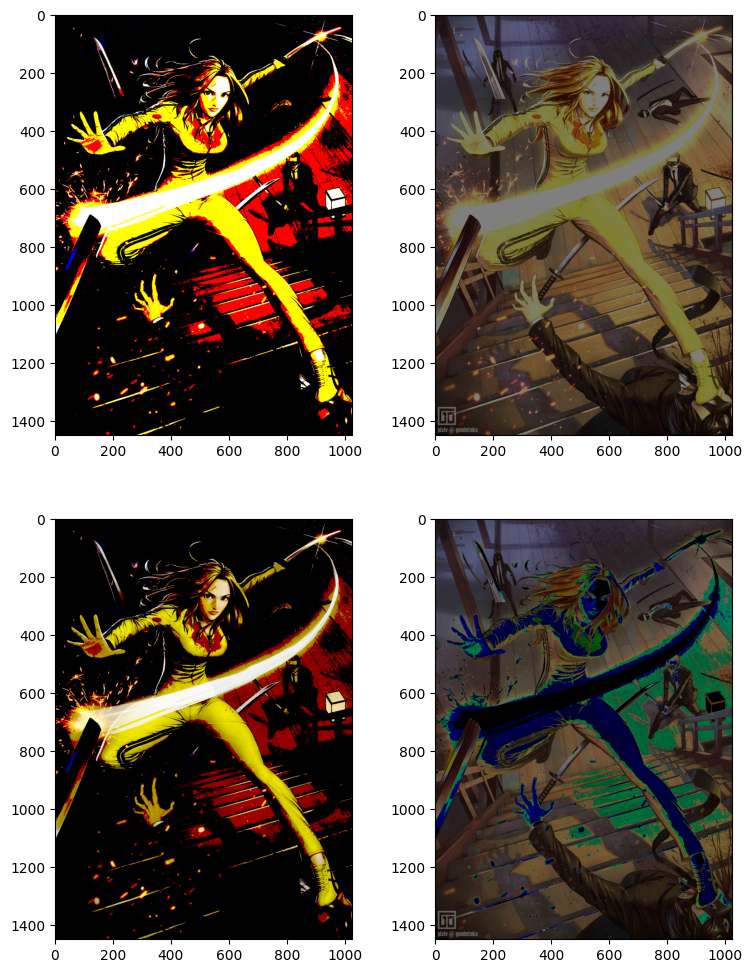

In [8]:
size = 20
plt.figure(figsize=(9, 12))

plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(thres_1, cv.COLOR_BGR2RGB))

plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(thres_2, cv.COLOR_BGR2RGB))

plt.subplot(2, 2, 3)
plt.imshow(cv.cvtColor(thres_3, cv.COLOR_BGR2RGB))

plt.subplot(2, 2, 4)
plt.imshow(cv.cvtColor(thres_4, cv.COLOR_BGR2RGB))

plt.show()

What if we don't want to handpick a threshold? Determine the threshold automatically.

`cv.adaptiveThreshold`


**THRESH_BINARY**

$ dst(x,y) =  {\texttt{maxValue }} {\text{if } (src(x,y) > T(x,y))} \hspace{4mm} {0} \hspace{1mm} {otherwise} $
  
**THRESH_BINARY_INV**

$ dst(x,y) =  {0}{\text{ if } src(x,y) > T(x,y))} \hspace{4mm} {\texttt{ maxValue}} \hspace{1mm} {otherwise} $

where $T(x,y)$ is a threshold calculated individually for each pixel (see adaptiveMethod parameter)

In [9]:
thres_4 = cv.adaptiveThreshold(
    cv.cvtColor(img, cv.COLOR_BGR2GRAY),
    maxValue=255,
    adaptiveMethod=cv.ADAPTIVE_THRESH_MEAN_C,
    thresholdType=cv.THRESH_BINARY,
    blockSize=3,
    C=5,
)
ret_4, thres_5 = cv.threshold(
    cv.cvtColor(img, cv.COLOR_BGR2GRAY),
    thresh=0,
    maxval=255,
    type=cv.THRESH_BINARY + cv.THRESH_OTSU,
)

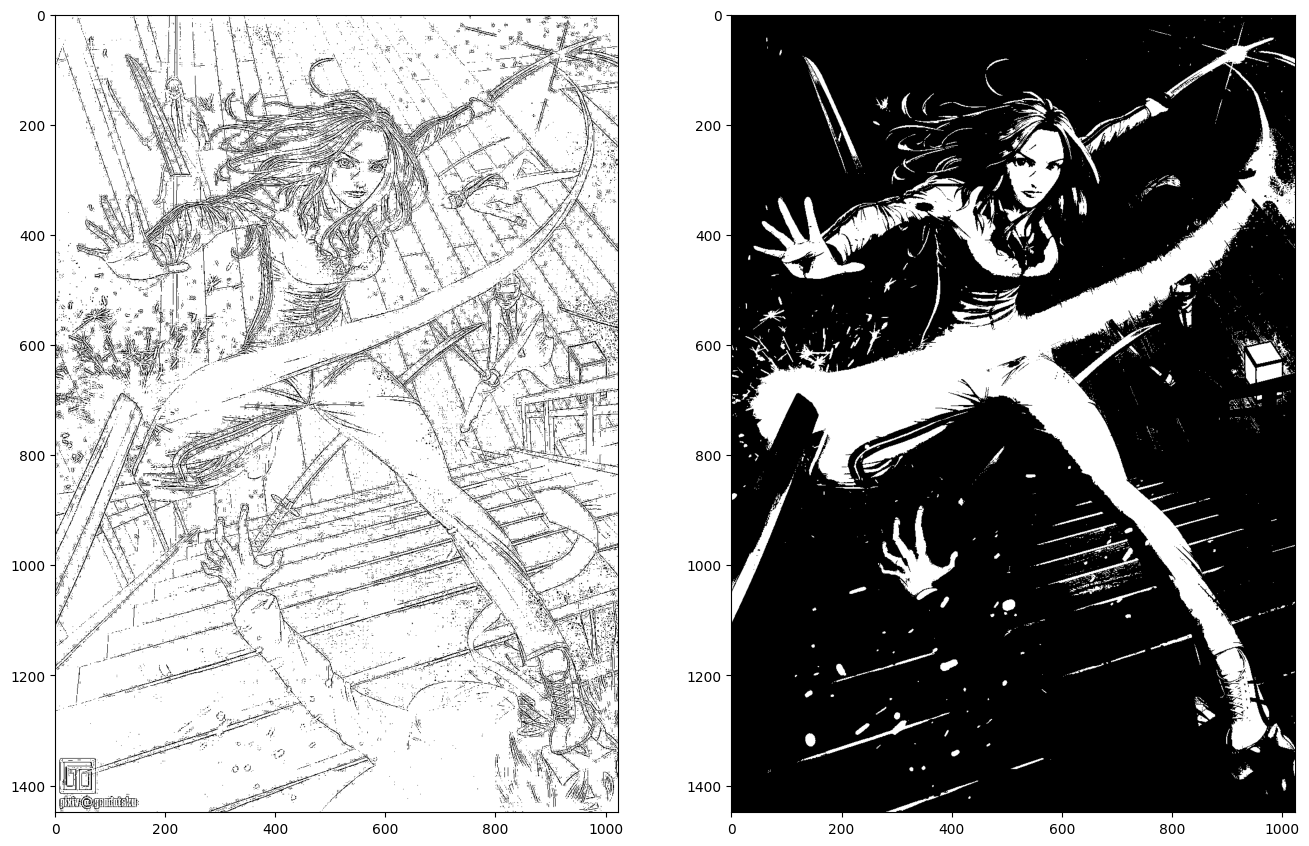

In [10]:
plt.figure(figsize=(16, 12))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(thres_4, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(thres_5, cv.COLOR_BGR2RGB))

plt.show()

### Dilation, erosion, edge-detection

 - Dilation - adds pixels to boundaries of an image.
 

 - Erosion - as the name suggests, erodes/removes the pixels from boundaries of an object.
 
 
 - `cv::morphologyEx` can perform advanced morphological transformations using an erosion and dilation as basic operations.

In [11]:
kernel = np.ones((5, 5), np.uint8)

eroded = cv.erode(img, kernel, iterations=2)
dilation = cv.dilate(img, kernel, iterations=2)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

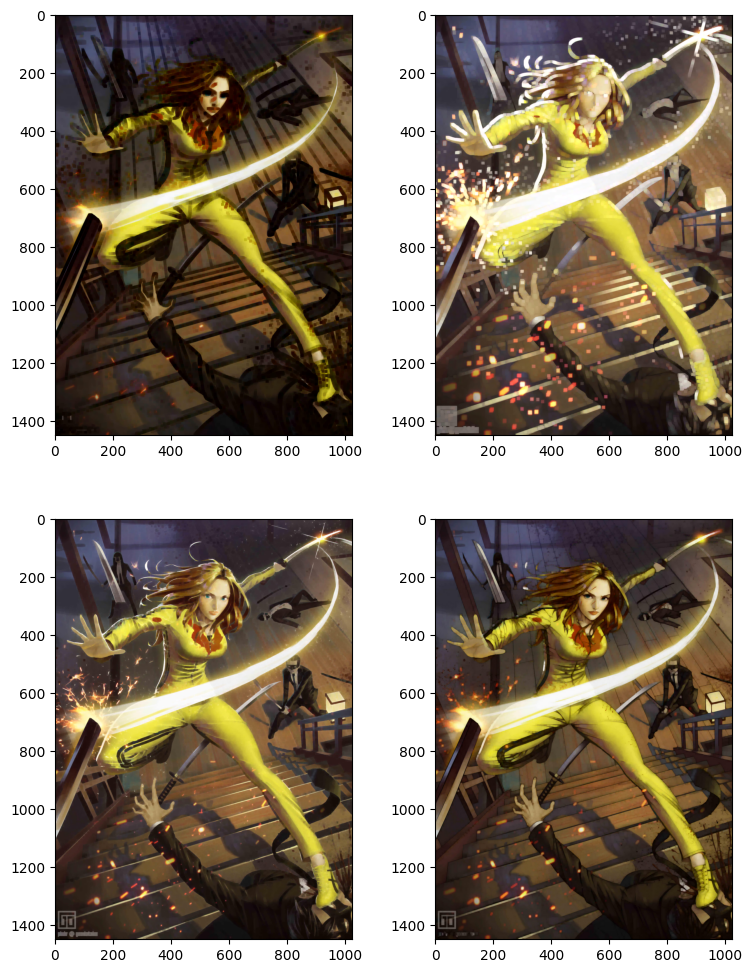

In [12]:
size = 20
plt.figure(figsize=(9, 12))

plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(eroded, cv.COLOR_BGR2RGB))

plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(dilation, cv.COLOR_BGR2RGB))

plt.subplot(2, 2, 3)
plt.imshow(cv.cvtColor(closing, cv.COLOR_BGR2RGB))

plt.subplot(2, 2, 4)
plt.imshow(cv.cvtColor(opening, cv.COLOR_BGR2RGB))

plt.show()

#### Canny edge

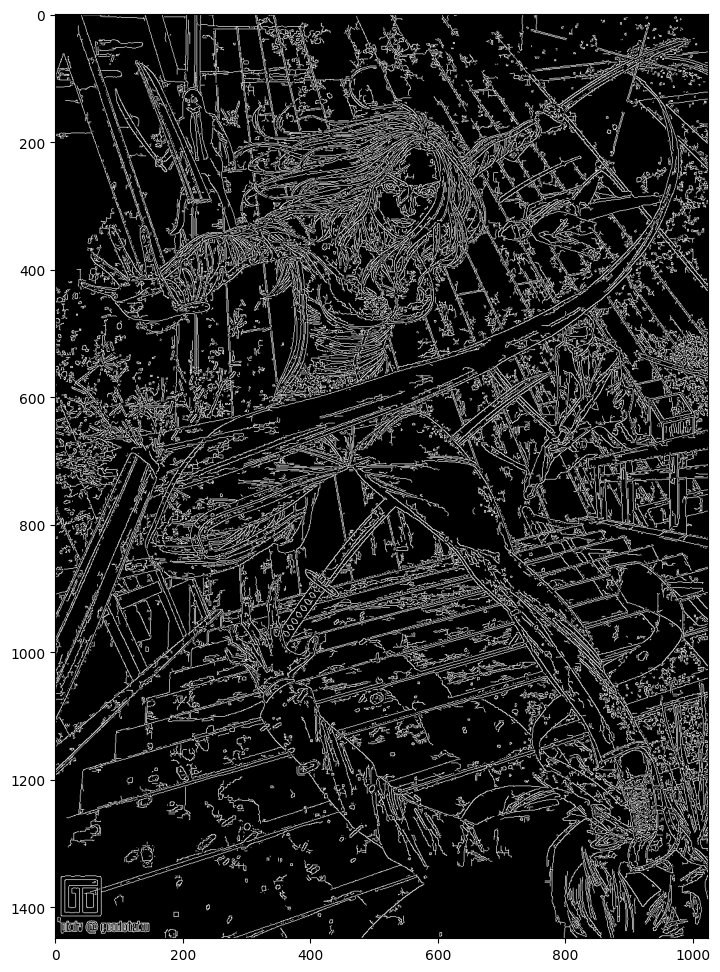

In [13]:
canny = cv.Canny(img, 10,100)

plt.figure(figsize=(9, 12))
plt.imshow(cv.cvtColor(canny, cv.COLOR_BGR2RGB))
plt.show()

> TODO: Implement canny edge detector from scratch.